# Image Processing With Machine Learning
Date: 18 December 2019
<br> Course: Convolutional Neural Netwroks for Image Processing 
<br> link: https://www.datacamp.com/courses/convolutional-neural-networks-for-image-processing


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import IPython as IP
import keras

Using TensorFlow backend.


<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> شبکه ی عصبی ما حرفه ای تر میشه اگه که ما مفهوم کانولوشن رو توش بیاریم. ولی خب چرا؟ مگه کانولوشن چیه و چیکار می کنه؟
            <br> در شبکه عصبی هایی که ما تا به حال برای خودمون درست میکردیم، هر نورون در لایه اول به طور جداکانه به همه ی  پیکسل های تصویر وزن می داشت و هیچ ارتباطی ما بین پیکسل ها نداشتیم یعنی هیچ تمایزی قائل نبودیم
            <br> ولی خب میدونیم که اینطوری نیست و بین پیکسل ها ارتباط وجود داره. مثلا همه ی پیکسل هایی که در یک لبه در تصویر هستند به هم ارتباط دارند. وقتی میگیم که ارتباط دارند منظورمون اینه که کورلیشن دارند
            <br> کانولوشن یه ابزار بسیار قوی ریاضی هست که می تونه این کورلیشن ها رو در بین پیکسل ها برامون استخراج کنه بنابراین کانولوشن ابزاری است که سی ان ان برای پردازش تصاویر ازون استفاده میکنه
            <br>
            <br> حالا بذار یه کم از قدرت کانولوشن برات بگم
            <br>
            <br> اول بذار کانولوشن رو در یک بعد برات مثال بزنم: اینجا من یه آرایه ی یک بعدی رو در نظر میگیرم که پنج تا صفر داره و پنج تا یک. بنابراین در المان پنجم یک لبه ی بالارونده داره. لبه ای که از صفر میره به یک
            <br> برای تشخیص این لبه با استفاده از کانولوشن به یه کرنل احتیاج داریم که این ویژگی رو بتونه داشته باشه پس یه کرنل به طول دو کفایت می کنه که مقدار اولش -1 و مقدار دومش 1 باشه. یعنی از -1 به 1 یعنی یه لبه ی بالارونده
        </b>
    </font>
</div>

In [12]:
x = np.array([0,0,0,0,0,1,1,1,1,1])
kernel = np.array([-1, 1])
conv = np.array([0,0,0,0,0,0,0,0,0,0])

for ii in range(8):
    conv[ii] = (kernel*x[ii:ii+2]).sum()
print(conv)

[0 0 0 0 1 0 0 0 0 0]


<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> می بینی چه با حال؟ لبه رو تشخیص داد. حالا اگه لبه بالا رونده باشه چی؟
        </b>
    </font>
    </div>

In [17]:
y = np.array([0,0,1,1,0,0,1,1,0,0])
conv_y = np.array([0,0,0,0,0,0,0,0,0,0])

for jj in range(8):
    conv_y[jj] = (kernel*y[jj:jj+2]).sum()
conv_y

array([ 0,  1,  0, -1,  0,  1,  0, -1,  0,  0])

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> دیدی چه باحال؟ اونا رو هم تشخیص داد. با علامت منفی
            <br> حالا برای تصویر چطوریه؟ برای تصویر کانولوشن دو بعدیه و کرنل هم دو بعدیه. در تصویر زیر در سمت چپ، تصویر یک لباس نشون داده شده که ما می خوایم لبه هاش رو شناسایی کنیم و در وسط، تصویر کرنل دو بعدی نشون داده شده است که می تونه لبه های چپ به راست رو تشخیص بده و در سمت راست حاصل اعمال اون کرنل بر اون تصویر نشون داده شده است.  
        </b>
    </font>
    </div>

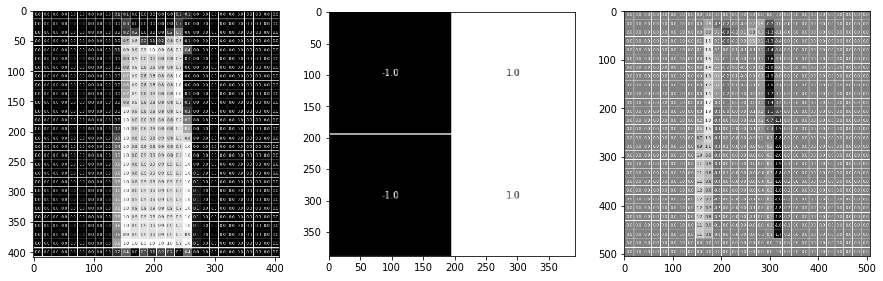

In [21]:
dress = plt.imread('photos/dress.png')
kernel_img = plt.imread('photos/kernel_edge.png')
dress_conved = plt.imread('photos/dress_conved.png')
fig, axiso = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axiso[0].imshow(dress)
axiso[1].imshow(kernel_img)
axiso[2].imshow(dress_conved)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> همونطور که میبینیم لبه های چپ به راست رو تشخیص داده و لبه های راست به چپ رو هم با علامت برعکس تشخیص داده
            <br> کانولوشن توی لبه ی چپ مثبت به دست اومده و توی لبه ی راست منفی
            <br> حالا بذار روی یه تصویر خودم کانولوشن بزنم برای تشخیص لبه
            <br> برای اینکار از داده های موجود در کراس یعنی داده ی خیلی معروف ام نیست استفاده می کنیم
        </b>
    </font>

In [24]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 80s 7us/step


In [25]:
x_train.shape

(60000, 28, 28)

In [52]:
sample_image = x_train[7,:,:]
conv_img = np.zeros((27,27),dtype='uint8')
kernel_2d = np.array([[-1,1],[-1,1]])
for i in range(27):
    for j in range(27):
        window = sample_image[i:i+2,j:j+2]
        conv_img[i,j] = (kernel_2d*window).sum()

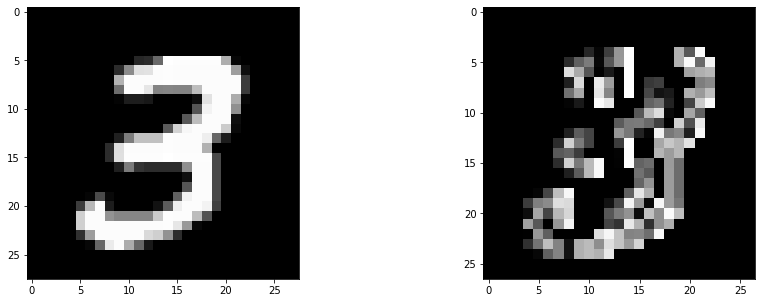

In [53]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plt.gray()
ax1[0].imshow(sample_image)
ax1[1].imshow(conv_img)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> که البته مشخصه که این تصویر مثال خوبی برای این کار نیست
            <br> به این چیزی که در نهایت بعد از کانولوشن به دست میاد میگیم فیچر مپ. چون درواقع یه مپ ازون فیچری رو بهمون میده که اون کرنل برای استخراجش طراحی شده
        </b>
    </font>

# Convolution in Neural Netwroks